In [5]:
import torch
from models.conv_net import ConvNetVAE
import torchvision
import torchvision.transforms as transforms

In [3]:
device = torch.device('cuda')
save_dir = '/home/tingchen/bayes-ae-save/'
pretrain_name = 'resnet_vae_just_pretrain_tiny_imagenet'
model = ConvNetVAE(latent_dim=2).to(device)

model.load_state_dict(
            torch.load(f'{save_dir}models/{pretrain_name}.pt'))

<All keys matched successfully>

In [6]:
data_dir = '/home/tingchen/data/'
transform = transforms.Compose([transforms.ToTensor()])
CIFAR10_data_train = torchvision.datasets.CIFAR10(data_dir,
                                                    train=True,
                                                    transform=transform,
                                                    download=False)

train_set, val_set = torch.utils.data.random_split(
    CIFAR10_data_train, [40000, 10000])
train_loader = torch.utils.data.DataLoader(train_set,
                                            batch_size=128,
                                            shuffle=True)

In [9]:
train_batch = next(iter(train_loader))

In [10]:
train_batch[0].shape

torch.Size([128, 3, 32, 32])

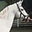

In [24]:
transform = transforms.ToPILImage()

transform(train_batch[0][1])

In [26]:
model(train_batch[0][1:2].to(device))[-1][0].shape

torch.Size([1, 3, 32, 32])

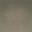

In [27]:
transform(model(train_batch[0][1:2].to(device))[-1][0].reshape(3, 32, 32))